## # Linear Regression - Algerian Forest Dataset

### Task-01: Dataframe - Algerian Forest Dataset

#### Step-01: Import all the libraries required to perform Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [4]:
df.drop(["Unnamed: 0", "day", "month", "year"], axis = 1, inplace = True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [6]:
df["Classes"] = np.where(df["Classes"] == "not fire", 0, 1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [8]:
x = df.drop("FWI", axis = 1)
y = df[["FWI"]]

In [9]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [10]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


### Task-02: Spliting - Train & Test Datasets

#### Step-01: Import train_test_split from sklearn.model_selection

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [13]:
print(x_train.head())
print(x_train.shape)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC   ISI   BUI  Classes  Region
97            29  74  19   0.1  75.8   3.6  32.2   2.1   5.6        0       1
141           31  72  14   0.2  60.2   3.8   8.0   0.8   3.7        0       2
192           40  31  15   0.0  94.2  22.5  46.3  16.6  22.4        1       2
68            32  60  18   0.3  77.1  11.3  47.0   2.2  14.1        0       1
119           32  47  14   0.7  77.5   7.1   8.8   1.8   6.8        0       1
(182, 11)


In [14]:
print(x_test.head())
print(x_test.shape)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  Classes  Region
24            31  64  15   0.0  86.7  14.2  63.8  5.7  18.3        1       1
6             33  54  13   0.0  88.2   9.9  30.5  6.4  10.9        1       1
152           28  58  18   2.2  63.7   3.2   8.5  1.2   3.3        0       2
232           34  58  13   0.2  79.5  18.7  88.0  2.1  24.4        0       2
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9        1       2
(61, 11)


In [15]:
print(y_train.head())
print(y_train.shape)

      FWI
97    0.9
141   0.3
192  21.6
68    2.6
119   0.9
(182, 1)


In [16]:
print(y_test.head())
print(y_test.shape)

     FWI
24   8.4
6    7.2
152  0.5
232  3.8
238  6.5
(61, 1)


#### Step-02: Check for multicollinearity

In [17]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot: >

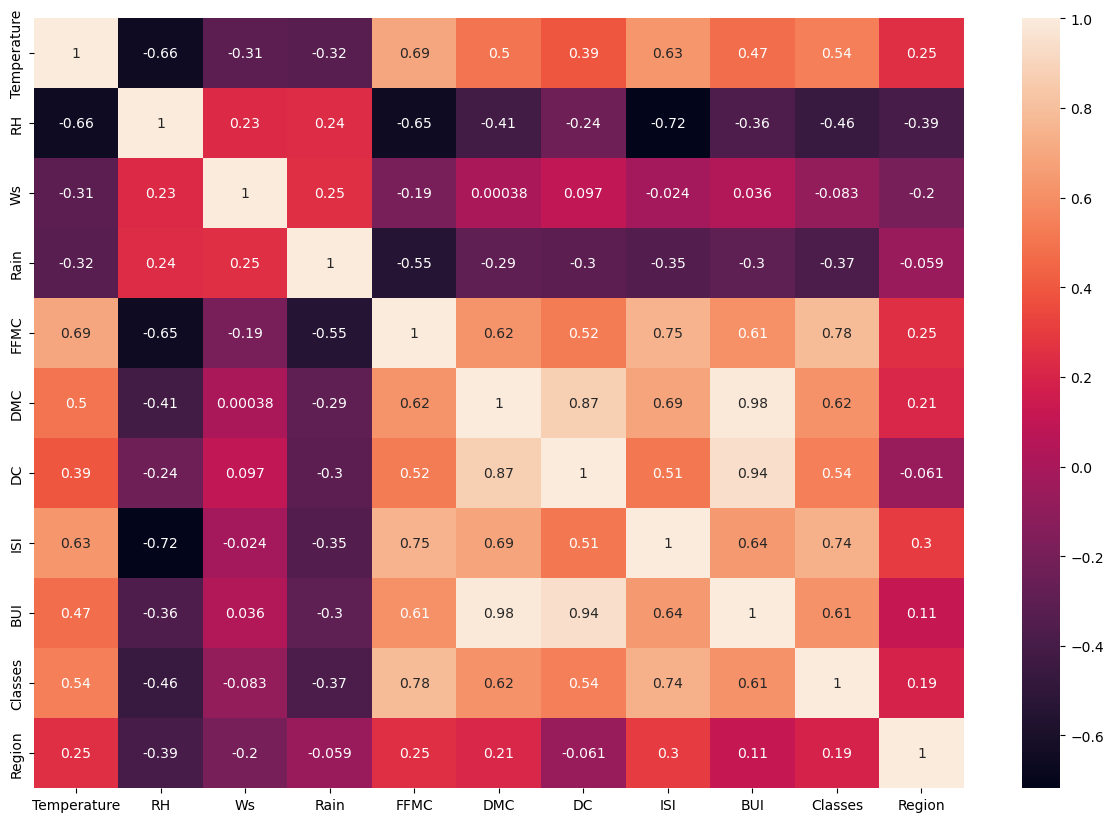

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(x_train.corr(), annot = True)

In [19]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col = dataset.columns[i]
                col_corr.add(col)
    return col_corr

In [20]:
corr_features = correlation(x_train, 0.85)

In [21]:
corr_features

{'BUI', 'DC'}

In [22]:
print("x_train.shape: " + str(x_train.shape))
print("x_test.shape: " + str(x_test.shape))

x_train.shape: (182, 11)
x_test.shape: (61, 11)


In [23]:
x_train.drop(corr_features, axis = 1, inplace = True)
x_test.drop(corr_features, axis = 1, inplace = True)

print("x_train.shape: " + str(x_train.shape))
print("x_test.shape: " + str(x_test.shape))

x_train.shape: (182, 9)
x_test.shape: (61, 9)


### Task-03: Feature Scaling - Standardization/Normalization

#### Step-01: Import StandardScaler from sklearn.preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler

StandardScaler()

In [27]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#### Step-02: Boxplots to understand the effect of StandardScaler

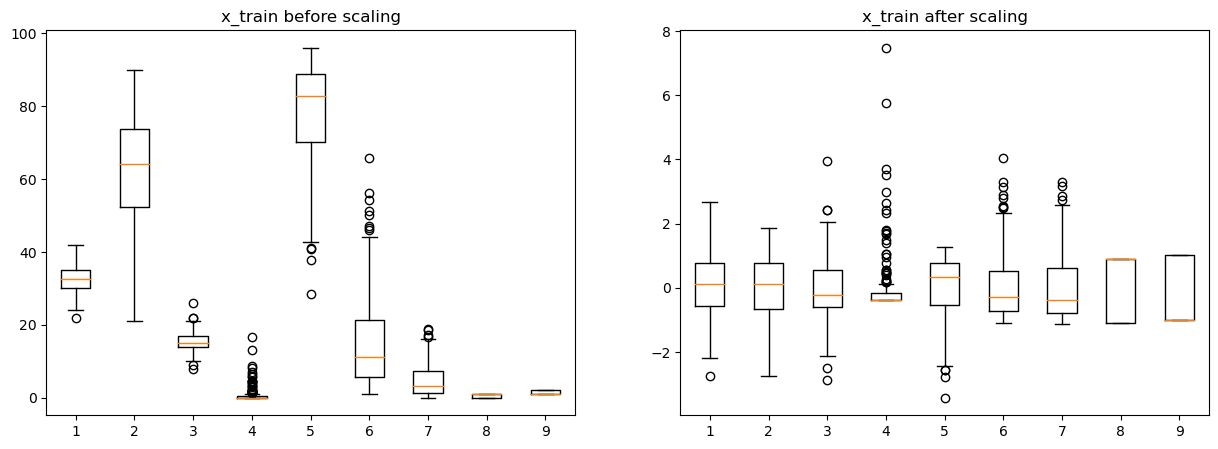

In [33]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.boxplot(x = x_train, )
plt.title("x_train before scaling")
plt.subplot(1, 2, 2)
plt.boxplot(x = x_train_scaled)
plt.title("x_train after scaling")
plt.show()

### Task-04: Ridge Regression

Mean Absolute Error: 0.5642305340105692
Accuracy: 0.9842993364555513


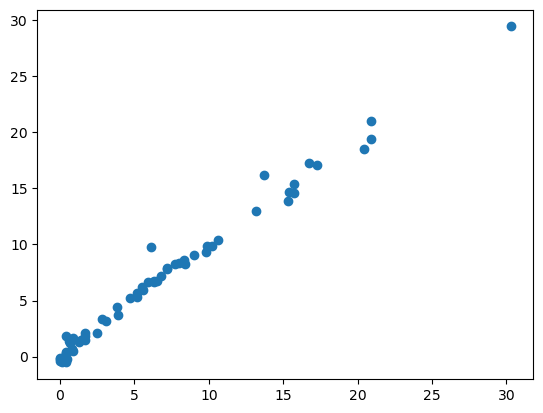

In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))

### Task-05: Lasso Regression

Mean Absolute Error: 1.133175994914409
Accuracy: 0.9492020263112388


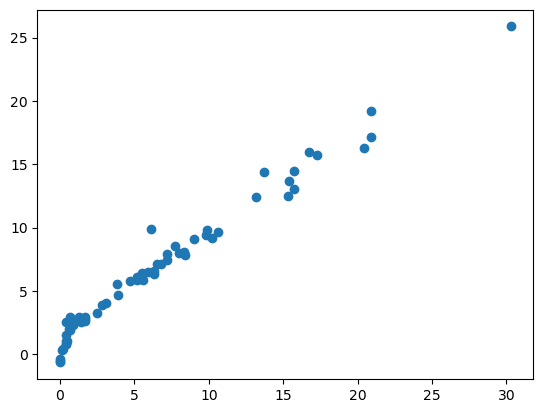

In [37]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))

### Task-06: Elastic Net Regression

Mean Absolute Error: 1.8822353634896005
Accuracy: 0.8753460589519703


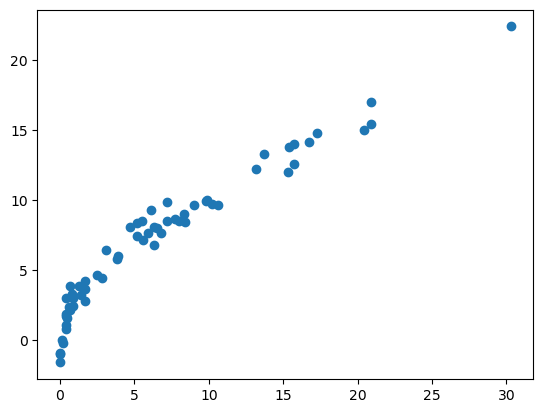

In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled, y_train)
y_pred = elastic_net.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))

### Task-07: Cross Validation Ridge

Mean Absolute Error: 0.5642305340105692
Accuracy: 0.9842993364555513


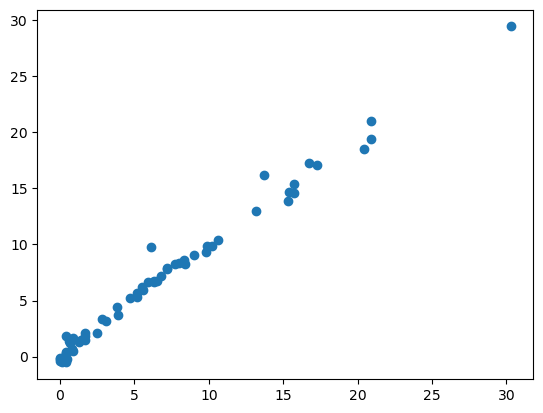

In [40]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(x_train_scaled, y_train)
y_pred = ridgecv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))

### Task-08: Cross Validation Lasso

Mean Absolute Error: 0.6199701158263433
Accuracy: 0.9820946715928275


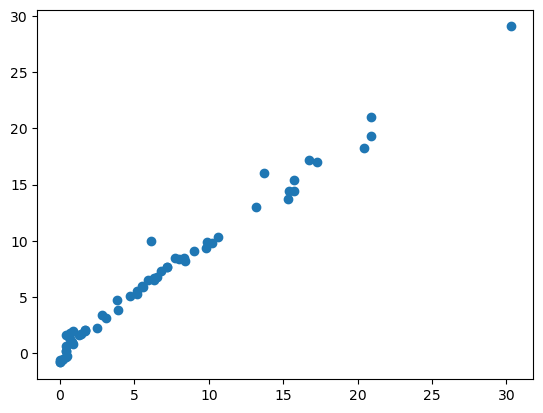

In [41]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled, y_train)
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))

### Task-09: Cross Validation Elastic Net

Mean Absolute Error: 0.6575946731430898
Accuracy: 0.9814217587854941


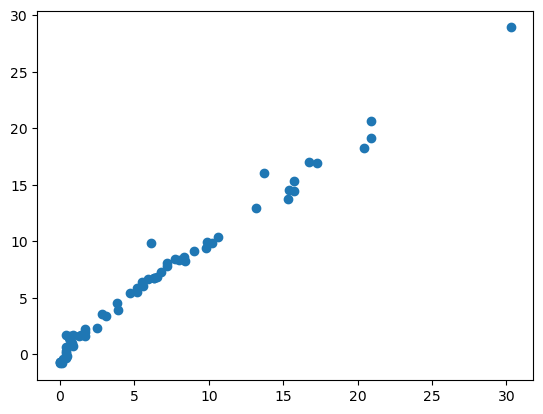

In [42]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic_net_cv = ElasticNetCV(cv = 5)
elastic_net_cv.fit(x_train_scaled, y_train)
y_pred = elastic_net_cv.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
print("Mean Absolute Error: {}" .format(mean_absolute_error(y_test, y_pred)))
print("Accuracy: {}" .format(r2_score(y_test, y_pred)))